### Data Processing

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv('GOOG.csv', date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3865,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
3866,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
3867,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
3868,2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600


In [35]:
train_data = data[data['Date']<'2019-01-01'].copy()
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3612,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3613,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3614,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3615,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [10]:
test_data = data[data['Date']>='2019-01-01'].copy()
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
3865,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
3866,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
3867,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
3868,2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


In [59]:
train_data = train_data.drop(['Date','Adj Close'], axis=1)
train_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [12]:
scalar = MinMaxScaler()
train_data = scalar.fit_transform(train_data)
#test_data = scalar.transform(test_data)

In [13]:
train_data

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [14]:
X_train = []
y_train = []

In [15]:
train_data.shape[0]

3617

In [16]:
for i in range(60, train_data.shape[0]):
    X_train.append(train_data[i-60:i])
    y_train.append(train_data[i,0])

In [17]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
X_train.shape, y_train.shape

((3557, 60, 5), (3557,))

### Build LSTM

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout

In [63]:
model = Sequential()

#model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],5)))
model.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],5)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
#model.add(Dropout(0.3))
model.add(Dropout(0.2))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dropout(0.2))

model.add(LSTM(units=120, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dropout(0.2))
          
model.add(Dense(units=1))

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 60)            29040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 120)              

In [65]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [66]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Train on 3557 samples
Epoch 1/50
3557/3557 [==============================] - 15s 4ms/sample - loss: 0.0119
Epoch 2/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0022
Epoch 3/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0023
Epoch 4/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0019
Epoch 5/50
3557/3557 [==============================] - 13s 4ms/sample - loss: 0.0021
Epoch 6/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0017
Epoch 7/50
3557/3557 [==============================] - 11s 3ms/sample - loss: 0.0017
Epoch 8/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0013
Epoch 9/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0016
Epoch 10/50
3557/3557 [==============================] - 12s 3ms/sample - loss: 0.0016
Epoch 11/50
3557/3557 [==============================] - 11s 3ms/sample - loss: 0.0013
Epoch 12/50
3557/3557 [=======

### Prepare Test Dataset

In [67]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [68]:
train_data.tail(60)

,Open,High,Low,Close,Volume
3557,1195.329956,1197.510010,1155.576050,1168.189941,2209500
3558,1167.500000,1173.500000,1145.119995,1157.349976,1184300
3559,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3560,1146.150024,1154.349976,1137.572021,1138.819946,1308700
3561,1131.079956,1132.170044,1081.130005,1081.219971,2675700
3562,1072.939941,1106.400024,1068.270020,1079.319946,2949000
3563,1108.000000,1115.000000,1086.401978,1110.079956,2101300
3564,1108.910034,1113.446045,1089.000000,1092.250000,1372400
3565,1104.589966,1124.219971,1102.500000,1121.280029,1928500
3566,1126.459961,1128.989990,1102.189941,1115.689941,1467200


In [69]:
past_60_days = train_data.tail(60)

In [70]:
df = past_60_days.append(test_data, ignore_index=True)

C:\Users\dipkumar\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [71]:
df

,Adj Close,Close,Date,High,Low,Open,Volume
0,NaN,1168.189941,NaN,1197.510010,1155.576050,1195.329956,2209500
1,NaN,1157.349976,NaN,1173.500000,1145.119995,1167.500000,1184300
2,NaN,1148.969971,NaN,1168.000000,1127.364014,1150.109985,1932400
3,NaN,1138.819946,NaN,1154.349976,1137.572021,1146.150024,1308700
4,NaN,1081.219971,NaN,1132.170044,1081.130005,1131.079956,2675700
...,...,...,...,...,...,...,...
308,1360.400024,1360.400024,2019-12-26,1361.327026,1344.469971,1346.170044,667500
309,1351.890015,1351.890015,2019-12-27,1364.530029,1349.310059,1362.989990,1038400
310,1336.140015,1336.140015,2019-12-30,1353.000000,1334.020020,1350.000000,1050900
311,1337.020020,1337.020020,2019-12-31,1338.000000,1329.084961,1330.109985,961800


In [72]:
df.drop(['Date','Adj Close'], axis=1, inplace=True)

In [73]:
df

,Close,High,Low,Open,Volume
0,1168.189941,1197.510010,1155.576050,1195.329956,2209500
1,1157.349976,1173.500000,1145.119995,1167.500000,1184300
2,1148.969971,1168.000000,1127.364014,1150.109985,1932400
3,1138.819946,1154.349976,1137.572021,1146.150024,1308700
4,1081.219971,1132.170044,1081.130005,1131.079956,2675700
...,...,...,...,...,...
308,1360.400024,1361.327026,1344.469971,1346.170044,667500
309,1351.890015,1364.530029,1349.310059,1362.989990,1038400
310,1336.140015,1353.000000,1334.020020,1350.000000,1050900
311,1337.020020,1338.000000,1329.084961,1330.109985,961800


In [74]:
inputs = scalar.transform(df)
inputs

array([[0.91583916, 0.93755773, 0.92220906, 0.94009085, 0.0266752 ],
       [0.90696551, 0.91792904, 0.91350452, 0.91725155, 0.01425359],
       [0.90010559, 0.91343268, 0.89872289, 0.90298003, 0.02331778],
       ...,
       [1.05332395, 1.06467408, 1.07076144, 1.06702442, 0.01263728],
       [1.05404433, 1.05241127, 1.06665307, 1.05070122, 0.01155772],
       [1.07888897, 1.07705137, 1.0770301 , 1.06008977, 0.01694704]])

In [75]:
X_test = []
y_test = []

for i  in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((253, 60, 5), (253,))

In [76]:
y_pred = model.predict(X_test)

In [77]:
y_pred

array([[0.7584504 ],
       [0.7593477 ],
       [0.7609774 ],
       [0.7631367 ],
       [0.76610744],
       [0.76994145],
       [0.7744306 ],
       [0.77876455],
       [0.7822343 ],
       [0.7843204 ],
       [0.78547144],
       [0.7866028 ],
       [0.78816754],
       [0.7905823 ],
       [0.79313767],
       [0.79535365],
       [0.7969651 ],
       [0.79841995],
       [0.7995579 ],
       [0.8001755 ],
       [0.8005159 ],
       [0.80146307],
       [0.8035655 ],
       [0.80675584],
       [0.81076866],
       [0.81519455],
       [0.81861395],
       [0.82059425],
       [0.8215356 ],
       [0.82208985],
       [0.8229819 ],
       [0.824313  ],
       [0.8259869 ],
       [0.82765394],
       [0.82913584],
       [0.8300185 ],
       [0.8302855 ],
       [0.83026874],
       [0.8300775 ],
       [0.8298665 ],
       [0.8298469 ],
       [0.83047736],
       [0.8321399 ],
       [0.8350852 ],
       [0.8390832 ],
       [0.8431034 ],
       [0.84608465],
       [0.848

### As the above values are scaled, so we need to inverse scale this

In [78]:
scalar.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [79]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [80]:
y_pred = y_pred*scale
y_test = y_test*scale

In [81]:
y_pred

array([[ 926.51556],
       [ 927.6117 ],
       [ 929.60254],
       [ 932.2403 ],
       [ 935.8693 ],
       [ 940.5529 ],
       [ 946.0368 ],
       [ 951.3311 ],
       [ 955.56976],
       [ 958.11816],
       [ 959.52423],
       [ 960.90625],
       [ 962.81775],
       [ 965.7676 ],
       [ 968.8892 ],
       [ 971.59625],
       [ 973.5648 ],
       [ 975.342  ],
       [ 976.7321 ],
       [ 977.4866 ],
       [ 977.9024 ],
       [ 979.05945],
       [ 981.62775],
       [ 985.525  ],
       [ 990.42706],
       [ 995.8337 ],
       [1000.0108 ],
       [1002.42993],
       [1003.57983],
       [1004.2569 ],
       [1005.3466 ],
       [1006.97266],
       [1009.0175 ],
       [1011.05396],
       [1012.8642 ],
       [1013.9425 ],
       [1014.2686 ],
       [1014.24817],
       [1014.0146 ],
       [1013.75684],
       [1013.73285],
       [1014.503  ],
       [1016.534  ],
       [1020.1319 ],
       [1025.0159 ],
       [1029.9269 ],
       [1033.5687 ],
       [1036.

In [82]:
y_test

array([ 996.44017501,  966.65019701, 1021.30016001, 1018.98021401,
       1026.87022801, 1025.25023301, 1020.92015501, 1007.78014001,
        995.28014001, 1027.74022301, 1031.56017001, 1040.49022301,
       1048.85020901, 1021.11021901, 1026.16014501, 1024.49022301,
       1041.58018901, 1020.67015501, 1011.21019401, 1039.65025801,
       1066.96019401, 1061.34019901, 1083.39024801, 1096.58018901,
       1065.82017901, 1049.30016001, 1045.65025801, 1045.60020901,
       1071.96019401, 1070.75023301, 1072.26024301, 1064.24022301,
       1069.15025801, 1064.39024801, 1047.56017001, 1060.96019401,
       1059.99022301, 1065.72020401, 1066.64024801, 1070.51024301,
       1091.58018901, 1098.39024801, 1112.62022801, 1108.45018401,
       1093.89024801, 1092.91014501, 1126.35020901, 1143.79015001,
       1143.91014501, 1136.14024801, 1135.05016001, 1134.85020901,
       1149.44017501, 1174.56017001, 1182.13023801, 1156.09019901,
       1143.59019901, 1135.21019401, 1123.61021901, 1119.08018

### Visualize the Predictions

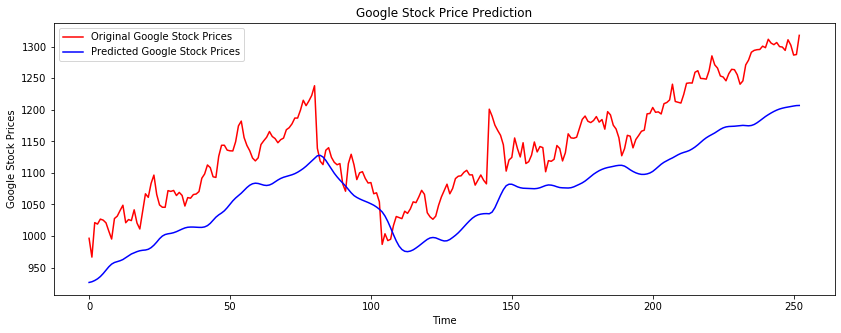

In [83]:
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='red', label = 'Original Google Stock Prices')
plt.plot(y_pred, color='blue', label = 'Predicted Google Stock Prices')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Prices')
plt.legend()
plt.show()